In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import cv2
import numpy as np 
img = cv2.imread("drive/MyDrive/hey/Training/glioma/Tr-glTr_0009.jpg") #;//Here is your file

In [ ]:
from PIL import Image 
imge = Image.open("drive/MyDrive/hey/Training/glioma/Tr-glTr_0009.jpg") 
imge.size 

(512, 512)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import DenseNet121

from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB2,EfficientNetB7,EfficientNetB5,InceptionResNetV2#,EfficientNetV2S
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import keras
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
#from pretty_confusion_matrix import pp_matrix
#confusion_matrix = metrics.confusion_matrix(y_true=y_test_labels, y_pred=pred_labels)  # shape=(12, 12)
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
classes=[]
filename='drive/MyDrive/hey'
for sub_folder in os.listdir(os.path.join(filename,'Training')):
    classes.append(sub_folder)
print(classes)

['pituitary', 'meningioma', 'notumor', 'glioma']


In [ ]:
import os

dir_path1 = 'drive/MyDrive/hey/Training/notumor'
dir_path2 = 'drive/MyDrive/hey/Training/glioma'
dir_path3 = 'drive/MyDrive/hey/Training/pituitary'
dir_path4 = 'drive/MyDrive/hey/Training/meningioma'

dir_path5 = 'drive/MyDrive/hey/Testing/notumor'
dir_path6 = 'drive/MyDrive/hey/Testing/glioma'
dir_path7 = 'drive/MyDrive/hey/Testing/pituitary'
dir_path8 = 'drive/MyDrive/hey/Testing/meningioma'

print("The number of images in training of 'NOTUMOR' class is", len([entry for entry in os.listdir(dir_path1) if os.path.isfile(os.path.join(dir_path1, entry))]))
print("The number of images in training of 'Glioma' class is", len([entry for entry in os.listdir(dir_path2) if os.path.isfile(os.path.join(dir_path2, entry))]))
print("The number of images in training of 'Pituitary' class is", len([entry for entry in os.listdir(dir_path3) if os.path.isfile(os.path.join(dir_path3, entry))]))
print("The number of images in training of 'Meningioma' class is", len([entry for entry in os.listdir(dir_path4) if os.path.isfile(os.path.join(dir_path4, entry))]))
print("\n\n")

print("The number of images in testing of 'NOTUMOR' class is", len([entry for entry in os.listdir(dir_path5) if os.path.isfile(os.path.join(dir_path5, entry))]))
print("The number of images in testing of 'Glioma' class is", len([entry for entry in os.listdir(dir_path6) if os.path.isfile(os.path.join(dir_path6, entry))]))
print("The number of images in testing of 'Pituitary' class is", len([entry for entry in os.listdir(dir_path7) if os.path.isfile(os.path.join(dir_path7, entry))]))
print("The number of images in testing of 'Meningioma' class is", len([entry for entry in os.listdir(dir_path8) if os.path.isfile(os.path.join(dir_path8, entry))]))


The number of images in training of 'NOTUMOR' class is 1990
The number of images in training of 'Glioma' class is 2147
The number of images in training of 'Pituitary' class is 2294
The number of images in training of 'Meningioma' class is 2161



The number of images in testing of 'NOTUMOR' class is 510
The number of images in testing of 'Glioma' class is 400
The number of images in testing of 'Pituitary' class is 374
The number of images in testing of 'Meningioma' class is 421


In [ ]:
#resize images and put together Training and Testing folder

X_train = []
y_train = []
image_size = 160
for i in classes:
    path_train = os.path.join(filename,'Training',i)
    for j in tqdm(os.listdir(path_train)): #Instantly make your loops show a smart progress meter 
        img = cv2.imread(os.path.join(path_train,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
    path_test = os.path.join(filename,'Testing',i)
    for j in tqdm(os.listdir(path_test)):
        img = cv2.imread(os.path.join(path_test,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img) 
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 400/400 [00:05<00:00, 79.42it/s] 


In [ ]:
#data augmentation
X_train, y_train = shuffle(X_train,y_train, random_state=42)
datagen = ImageDataGenerator(
    rotation_range=7, #rotate images
    width_shift_range=0.05,
    height_shift_range=0.05, #shift image in horizontal and vertical
    zoom_range=0.1, #zoom images
    horizontal_flip=True)

datagen.fit(X_train)
X_train.shape
lb = LabelEncoder()

#train and test splitting 
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.15,random_state=42,stratify=y_train)

labels_train=lb.fit(y_train)
y_train=lb.transform(y_train)
y_test=lb.transform(y_test)

In [ ]:
print(y_train)

#load EfficientNet 
EfficientNet=VGG19(weights='imagenet', include_top=False,input_shape=(image_size,image_size,3)) 

[2 1 0 ... 1 3 0]
94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
#train the model
tf.random.set_seed(45)
model = EfficientNet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.55)(model)
model = tf.keras.layers.Dense(60,activation='elu',kernel_initializer='GlorotNormal')(model)
model = tf.keras.layers.Dropout(rate=0.3)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=EfficientNet.input, outputs = model)
opt = Adam(
    learning_rate=0.0016, beta_1=0.91, beta_2=0.9994,
    epsilon=1e-08)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

# summarize the model
print(model.summary())
# fit the model
early_stopping_cb=keras.callbacks.EarlyStopping(patience=9,restore_best_weights=True)


history=model.fit(X_train ,y_train,validation_data = (X_test,y_test),epochs=5,
    batch_size=13,callbacks=early_stopping_cb)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 166, 166, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 80, 80, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 80, 80, 64)   256         ['conv1_conv[0][0]']       

In [ ]:
y_train.shape,y_test.shape

((8752,), (1545,))

In [ ]:
loss, accuracy = model.evaluate(X_test,y_test)

print('Accuracy: %f' % (accuracy*100))

49/49 [==============================] - 4s 64ms/step - loss: 1.3420 - accuracy: 0.6362
Accuracy: 63.624597


In [ ]:
loss, accuracy = model.evaluate(X_test,y_test)

49/49 [==============================] - 10s 202ms/step - loss: 0.1108 - accuracy: 0.9644


In [ ]:
model.optimizer.get_config() 

{'name': 'Adam',
 'learning_rate': 0.0016,
 'decay': 0.0,
 'beta_1': 0.91,
 'beta_2': 0.9994,
 'epsilon': 1e-08,
 'amsgrad': False}

In [ ]:
print(f'accuracy : {round(accuracy*100,3)} \n loss : {round(loss,3)}')

accuracy : 63.625 
 loss : 1.342


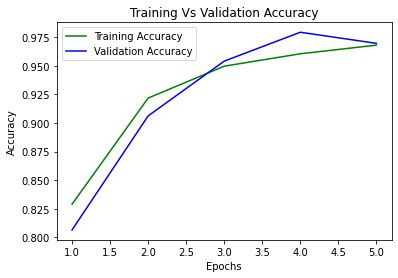

In [ ]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

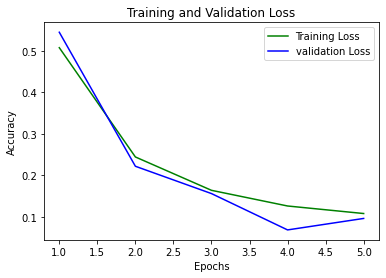

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_test_labels=lb.inverse_transform(y_test)

#predicted values
pred=np.argmax(model.predict(X_test),axis=1)
pred_labels=lb.inverse_transform(pred) #predicted labels

49/49 [==============================] - 14s 199ms/step


In [ ]:
pd.Series(pred_labels).value_counts()

meningioma    414
pituitary     394
notumor       378
glioma        359
dtype: int64

In [ ]:
print(classification_report(y_test,pred,target_names=classes))

              precision    recall  f1-score   support

     notumor       0.98      0.92      0.95       382
   pituitary       0.91      0.97      0.94       388
  meningioma       0.99      0.99      0.99       375
      glioma       0.98      0.97      0.98       400

    accuracy                           0.96      1545
   macro avg       0.97      0.96      0.96      1545
weighted avg       0.97      0.96      0.96      1545



In [ ]:
import matplotlib.image as mpimg
os.chdir('drive/MyDrive/hey')
TEST_DIR='Testing'
#fetch images from the original validation dataset and resize them in order to plot the images.
images=[] 
n_classes=4
z_max=20
for i,filenames in enumerate(os.listdir(TEST_DIR)): 
    dir_fold=os.path.join(TEST_DIR, filenames)
    print(dir_fold)
    class_images=[]
    z=0
    for filename in os.listdir(dir_fold):
        if z < z_max:
            img_path = os.path.join(dir_fold, filename)
            img = cv2.imread(img_path)  
            img = cv2.resize(img,(image_size,image_size))
            class_images.append(img)
            z+=1
        else:
            break
    images.append(class_images)
images=images[:20]

FileNotFoundError: ignored

In [ ]:
X_test_images=dict(zip(classes,[[],[],[],[]]))
for y,ele in enumerate(pred):
    for i,x in enumerate(X_test_images):
        #num=pred[ind]
        if ele==i:
            if len(X_test_images[classes[i]])<z_max:
                X_test_images[classes[i]].append(X_test[y])
X_test_images=[X_test_images[i]  for i in X_test_images]

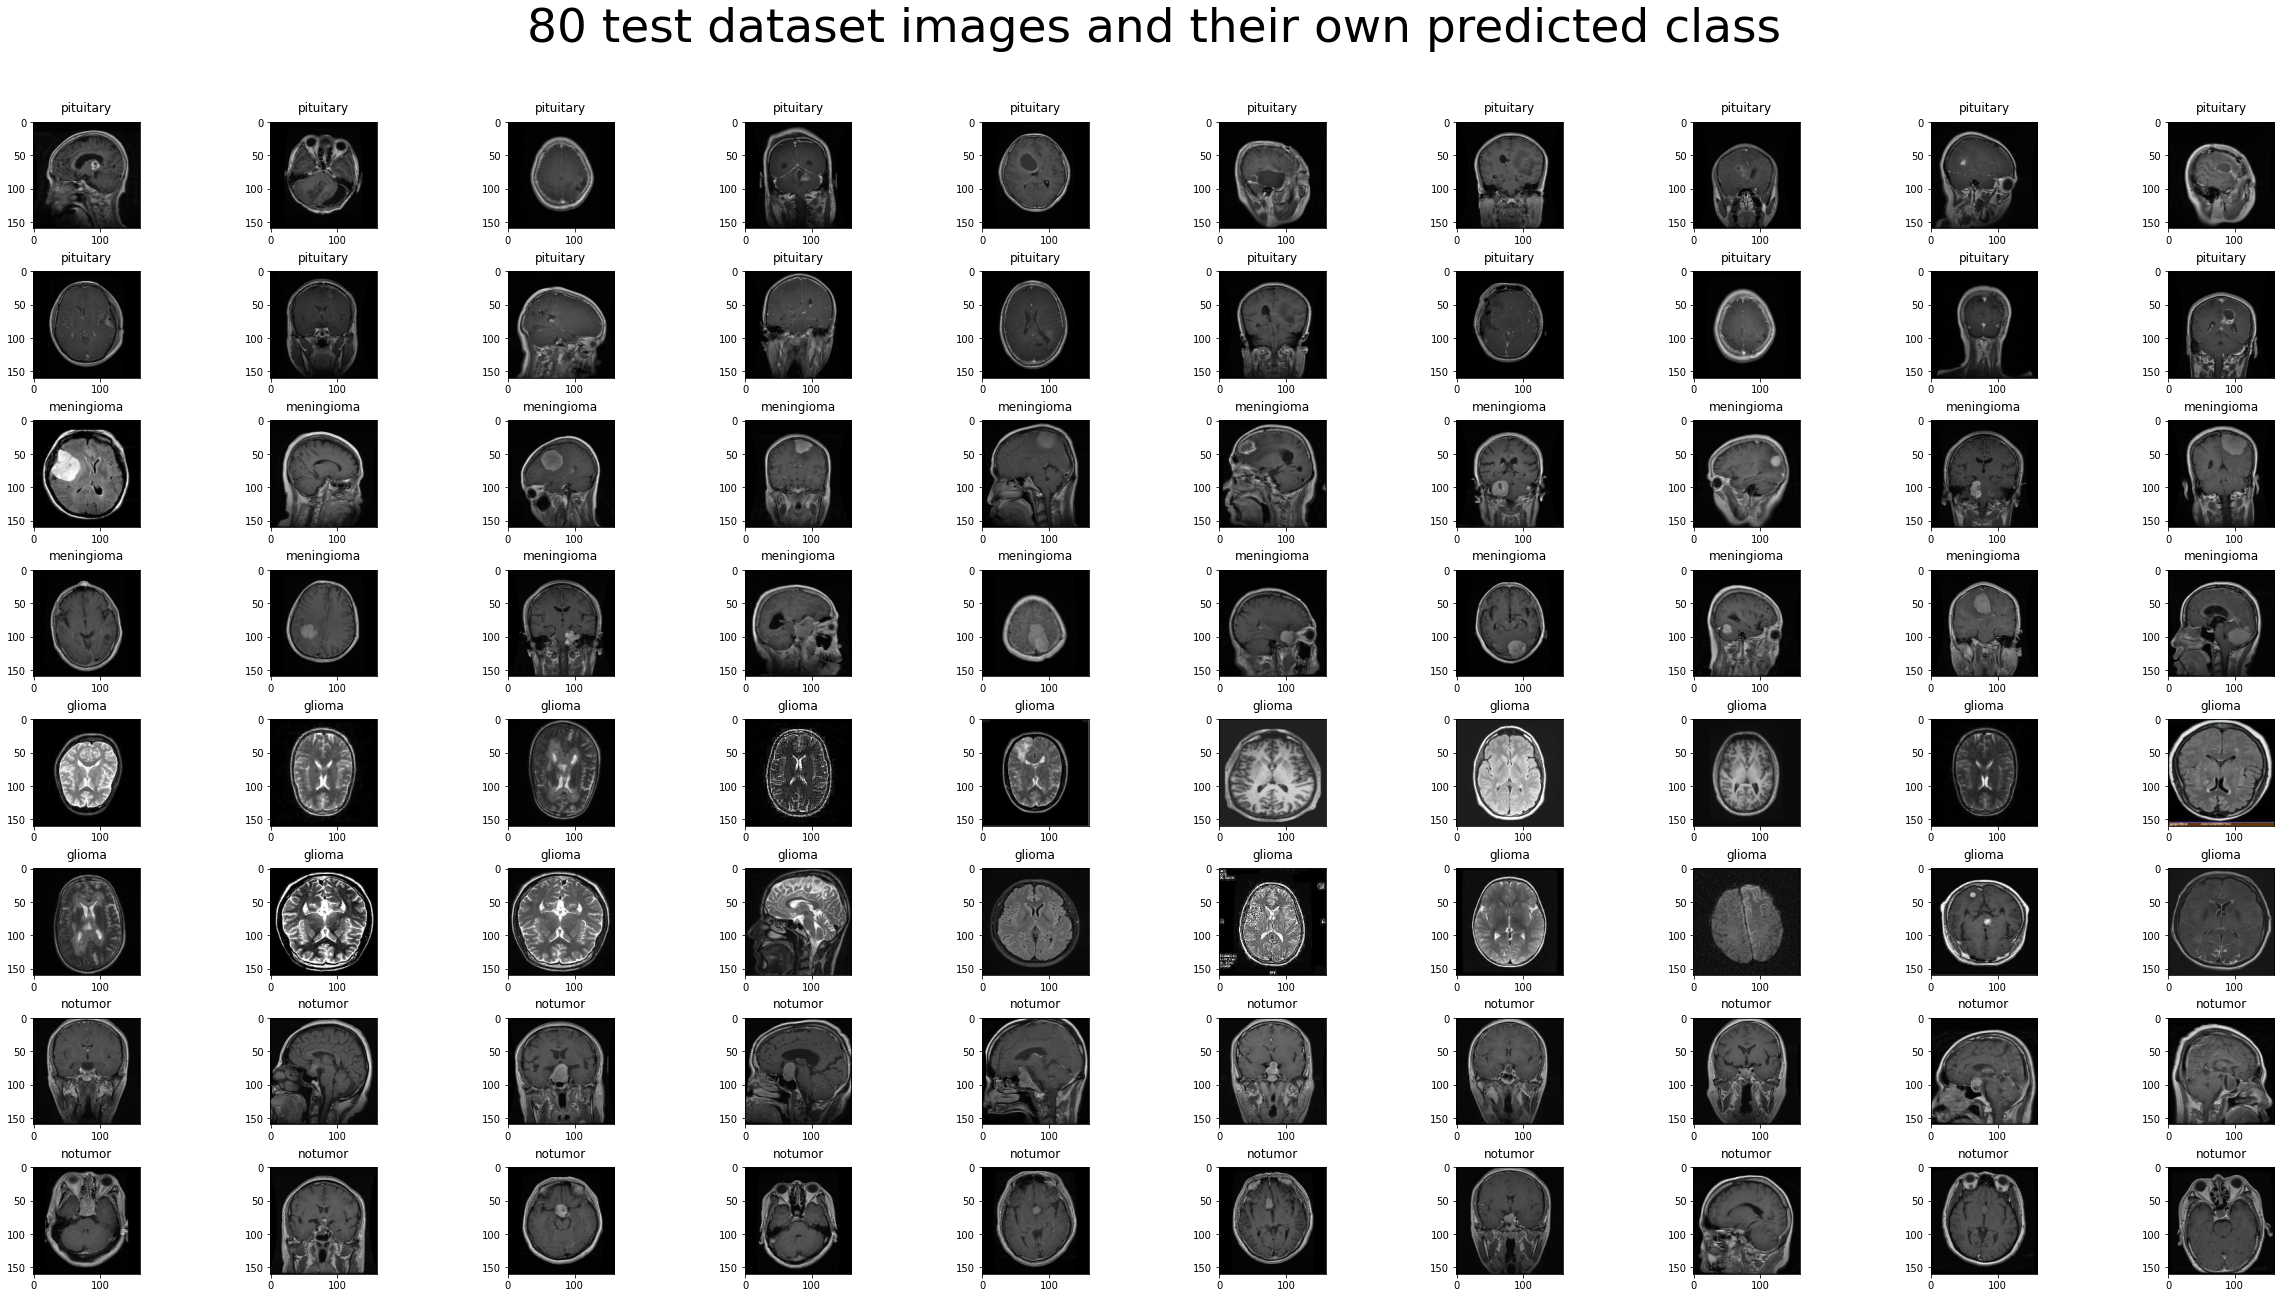

In [ ]:
columns = 10
fig,axes=plt.subplots(int(len(X_test_images)*len(X_test_images[0])/columns),columns,figsize=(40,20))
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
for i,ind in enumerate(X_test_images):
    #print(images_class)
    fig.suptitle('80 test dataset images and their own predicted class',fontsize=47)
    for j, image in enumerate(ind):
        #print(j,image)
        if int((i)*(len(ind)/columns)+(int(j/columns)))<n_classes*(z_max/columns):
            axes[int((i)*(len(ind)/columns)+(int(j/columns))),j % columns].imshow(image)
            axes[int((i)*(len(ind)/columns)+(int(j/columns))),j % columns].set_title(f'{classes[i]}',pad=10)

In [ ]:
X_test.shape

(1055, 160, 160, 3)

In [ ]:
predicted = model.predict(X_test)
predicted[9]

49/49 [==============================] - 10s 199ms/step


array([1.4315011e-03, 4.0484473e-04, 9.9815780e-01, 5.8863252e-06],
      dtype=float32)

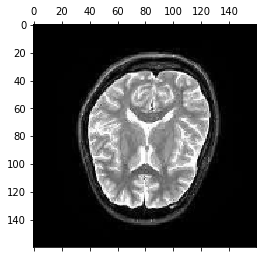

In [ ]:
plt.matshow(X_test[0])

In [ ]:
import numpy as np
np.argmax(predicted[0])


# 1 'pituitary'
# 2 'meningioma'
# 3 'glioma'
# 4 'notumor'

2

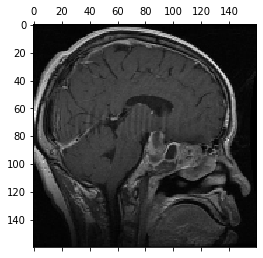

In [ ]:
plt.matshow(X_train[0])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
# X_train_flattened = X_train.reshape(len(X_train),160*160)
# X_test_flattened = X_test.reshape(len(X_test),160*160)

In [ ]:
len(X_train)

5978

In [ ]:
len(X_test)

1055

In [ ]:
X_train[0].shape

(160, 160, 3)

In [ ]:
model1 = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

In [ ]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model1.fit(X_train,y_train,epochs=5)

In [ ]:
model1.evaluate(X_test,y_test)

In [ ]:
predicted = model1.predict(X_test)
predicted[0]

In [ ]:
plt.matshow(X_test[0])